# Importar Bibliotecas

In [1]:
import pandas as pd
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Função para facilitar QUERY

In [2]:
caminho_dados = os.path.join('../DADOS')
caminho_banco = os.path.join(caminho_dados, 'banco_Monitor_Inteligencia_HidroFinanceira_SetorEletrico.db')

def executar_query(sql):
    with sqlite3.connect(caminho_banco) as conexao:
        return pd.read_sql(sql, conexao, parse_dates='ear_data')

# Leitura das tabelas

In [ ]:
# Sudeste filtrado por conta de 70% de toda o armazenamento está lá, além da maior parte do consumo. Obtendo já um bom reflexo do todo.
df_ear_ons = executar_query('''
    SELECT 
        nom_subsistema as estado,
        ear_data as data,
        ear_max_subsistema as ear_max,
        ear_verif_subsistema_mwmes as ear_mwmes,
        ear_verif_subsistema_percentual as ear_percentual
    FROM tb_ear_ons
                            
    WHERE estado = 'SUDESTE'
                            
    ORDER BY data
''')

df_ear_ons.head()

,estado,data,ear_max,ear_mwmes,ear_percentual
0,SUDESTE,2000-01-01,155759.0,27853.0,17.879999
1,SUDESTE,2000-01-02,155759.0,28671.0,18.410000
2,SUDESTE,2000-01-03,155759.0,30000.0,19.260000
3,SUDESTE,2000-01-04,155759.0,31898.0,20.480000
4,SUDESTE,2000-01-05,155759.0,33627.0,21.590000


In [ ]:
df_pld_semanal = executar_query('''
    SELECT
    DATA_FIM as data,
    SUDESTE,
    SUL,
    NORDESTE,
    NORTE
    
    FROM tb_pld_semanal

''')

# Transformar as colunas de regiões em linhas
df_pld_semanal = df_pld_semanal.melt(
    id_vars=['data'], # Coluna que não muda
    var_name='estado', # Nome da nova coluna que terá "SUDESTE", "SUL"...
    value_name='valor_pld' # Nome da nova coluna com os números
)

,data,estado,valor_pld
0,2001-07-06,SUDESTE,684.00
1,2001-07-13,SUDESTE,684.00
2,2001-07-20,SUDESTE,684.00
3,2001-07-27,SUDESTE,684.00
4,2001-08-03,SUDESTE,684.00
...,...,...,...
5075,2025-08-29,NORTE,292.16
5076,2025-09-05,NORTE,249.87
5077,2025-09-12,NORTE,285.92
5078,2025-09-19,NORTE,254.86


<Axes: xlabel='data', ylabel='ear_percentual'>

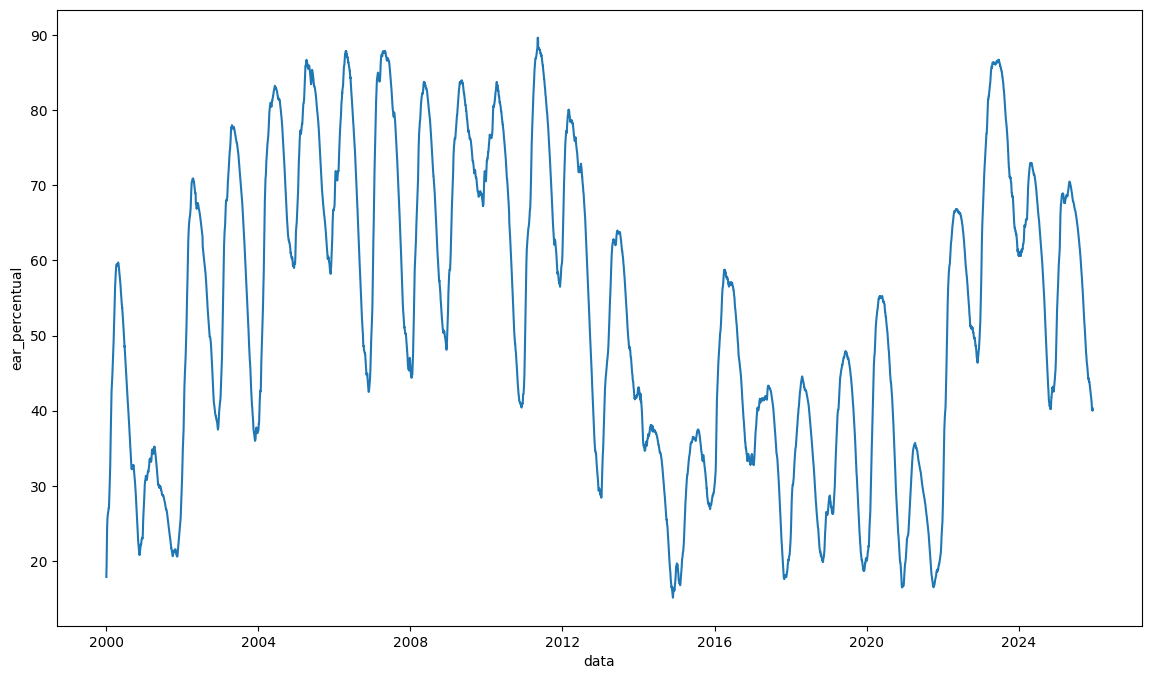

In [4]:
plt.figure(figsize=(14,8))

sns.lineplot(
    data=df_ear_ons,
    x='data',
    y='ear_percentual'
)